# Training and validation with PyRadiomics Features

### Imports

In [2]:
#!/usr/bin/env python
from __future__ import print_function
# import six
import os  # needed navigate the system to get the input data
import pandas as pd
import numpy as np
import dataframe_image as dfi
from pathlib import Path
import xgboost
from pycaret.classification import *
# import ydata_profiling
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina' #or 'retina'. Makes the images more clear
import matplotlib.pyplot as plt

from modules.modules import (
    calculate_sensitivity,
    calculate_specificity, 
    save_df_to_png,
    load_all_data
)

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

## Load features dataset

In [4]:
params_file = "just_features"
df_radiomics, df_radiomics_clinical = load_all_data(params_file)

Radiomics Dataset shape (199, 1198)
Clinical Data Dataset shape (199, 18)
Dataset with Radiomics features and target label shape (198, 1198)
Dataset with Radiomics features and clinical data shape (198, 1214)


## Define the Experiment Name

In [5]:
experiment_name = "basic"
# experiment_name = "remove_outliers"
# experiment_name = "remove_multicollinearity"
# experiment_name = "fix_imbalance_synthetic_data"
# experiment_name = "pca"
# experiment_name = "feature_selection"
# experiment_name = "ensemble_models"

In [8]:
clf = setup(data = df_radiomics,                # The dataset we want to use
   session_id=42,                               # Controls the randomness of the experiment
   experiment_name=experiment_name,             # Experiment name
   target = 'Death',                            # The feature we want to predict
   use_gpu = True,                              # Use GPU when possible
   fold = 10,                                   # Number of folds for cross-validation
   fold_strategy = 'stratifiedkfold',           # Folds methods: kfold, stratifiedkfold, groupkfold, timeseries
   train_size = 0.70,                           # Proportion of data used for training
   # remove_outliers = True,                      # Remove outliers using an Isolation Forest.
   # outliers_method = 'iforest',                 # Methods for outliers: iforest:Isolation Forest, ee:EllipticEnvelope, lof: LocalOutlierFactor
   # normalize = True,                            # Normalize with zscore. Scale to mean 0 std 1
   # normalize_method = 'robust',                 # Methods available: zscore, minmax, maxabs, robust
   # remove_multicollinearity = True,             # Features with the inter-correlations higher than the defined threshold are removed
   # multicollinearity_threshold = 0.75,          # Minimum absolute Pearson correlation to identify correlated features
   # fix_imbalance = False,                       # Use SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic datapoints for minority class
   # pca = True,                                  # Apply dimensionality reduction to project the data into a lower dimensional space 
   # pca_method = 'linear',                       # PCA methods: 'linear', 'kernel', 'incremental'
   # pca_components = 59,                         # Number of components to keep. int or float
   # feature_selection = True,                    # Select a subset of features based on a feature importance score
   # feature_selection_method = 'classic',        # Methods: 'univariate': SelectKBest, 'classic': SelectFromModel, 'sequential': SequentialFeatureSelector
   # feature_selection_estimator = 'lightgbm',    # LGBClassifier is used to determine the feature importances
   # n_features_to_select = 20,                   # Maximum number of features to select
   # profile=True                                 # When set, an interactive EDA report is displayed.
   verbose=False                                # When set, it displays the setup process
)
# add Specificity to metrics
add_metric('spec', 'Specificity', calculate_specificity)
# add Sensitivity to metrics
add_metric('sens', 'Sensitivity', calculate_sensitivity)
# remoce recall
remove_metric('recall')
include = list(models().axes[0])

features_heatplot = sns.heatmap(clf.dataset_transformed.drop(('Death'), axis=1).corr(), cmap="YlGnBu")
plt.savefig(f'./results/{experiment_name}/features_correlation.png', bbox_inches="tight") 
plt.clf()

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the prov

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recomp

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the prov

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


<Figure size 800x550 with 0 Axes>

In [61]:
# Store setup settings
setup_settings = clf._display_container[0].copy()
setup_settings = setup_settings.drop([5, 6, 8, 9, 10, 11, 16, 18], axis=0)
setup_settings.reset_index(drop=True, inplace=True)
store_path = f'./results/{experiment_name}/setup_settings.png'
save_df_to_png(setup_settings, store_path)

,Description
0,Session id
1,Target
2,Target type
3,Original data shape
4,Transformed data shape
5,Numeric features
6,Fold Generator
7,Fold Number
8,CPU Jobs
9,Use GPU


In [46]:
# top3 = compare_models(incalude = ['xgboost', 'catboost', 'lightgbm', 'ada', 'eat', 'mlp', 'dt', 'ridge', 'lr'], sort='Prec.', n_select=3)
# top3 = compare_models(include = ['svm', 'ridge', 'lr'], sort='AUC', n_select=3)
# top3 = compare_models(include = ['xgboost', 'catboost', 'lightgbm', 'ada'], sort='Prec.', n_select=3)
train_models = compare_models(include = include, sort='Sensitivity', n_select=19)

,Model,Accuracy,AUC,Prec.,F1,Kappa,MCC,Specificity,Sensitivity,TT (Sec)
nb,Naive Bayes,0.5813,0.6164,0.4733,0.5799,0.2174,0.2358,0.4694,0.7700,0.0110
qda,Quadratic Discriminant Analysis,0.6093,0.6485,0.4797,0.5628,0.2367,0.2817,0.5333,0.7333,0.0090
lr,Logistic Regression,0.6027,0.6003,0.5472,0.4681,0.1703,0.1982,0.6667,0.4967,0.2720
ada,Ada Boost Classifier,0.6593,0.6247,0.6639,0.4684,0.2388,0.2859,0.8069,0.4200,0.0590
svm,SVM - Linear Kernel,0.5643,0.0000,0.3504,0.2879,0.0564,0.0800,0.6556,0.3933,0.0100
lda,Linear Discriminant Analysis,0.5440,0.5026,0.3862,0.3821,0.0281,0.0283,0.6417,0.3900,0.0120
gbc,Gradient Boosting Classifier,0.6093,0.5951,0.5262,0.4165,0.1379,0.1535,0.7500,0.3767,0.2260
dt,Decision Tree Classifier,0.5148,0.4896,0.3879,0.3491,-0.0202,-0.0048,0.6125,0.3667,0.0130
knn,K Neighbors Classifier,0.5808,0.5262,0.5131,0.3886,0.0827,0.1078,0.7125,0.3633,0.0850
et,Extra Trees Classifier,0.6236,0.6043,0.5108,0.3767,0.1423,0.1594,0.7944,0.3500,0.0230


In [35]:
pull()

,Model,Accuracy,AUC,Prec.,F1,Kappa,MCC,Specificity,Sensitivity,TT (Sec)
nb,Naive Bayes,0.5813,0.6164,0.4733,0.5799,0.2174,0.2358,0.4694,0.7700,0.011
qda,Quadratic Discriminant Analysis,0.6093,0.6485,0.4797,0.5628,0.2367,0.2817,0.5333,0.7333,0.010
lr,Logistic Regression,0.6027,0.6003,0.5472,0.4681,0.1703,0.1982,0.6667,0.4967,0.252
ada,Ada Boost Classifier,0.6593,0.6247,0.6639,0.4684,0.2388,0.2859,0.8069,0.4200,0.056
svm,SVM - Linear Kernel,0.5643,0.0000,0.3504,0.2879,0.0564,0.0800,0.6556,0.3933,0.009
lda,Linear Discriminant Analysis,0.5440,0.5026,0.3862,0.3821,0.0281,0.0283,0.6417,0.3900,0.012
gbc,Gradient Boosting Classifier,0.6093,0.5951,0.5262,0.4165,0.1379,0.1535,0.7500,0.3767,0.224
dt,Decision Tree Classifier,0.5148,0.4896,0.3879,0.3491,-0.0202,-0.0048,0.6125,0.3667,0.015
knn,K Neighbors Classifier,0.5808,0.5262,0.5131,0.3886,0.0827,0.1078,0.7125,0.3633,0.082
et,Extra Trees Classifier,0.6236,0.6043,0.5108,0.3767,0.1423,0.1594,0.7944,0.3500,0.023


In [53]:
evaluate_model(train_models[4], plot_kwargs = {'percent' : True})

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

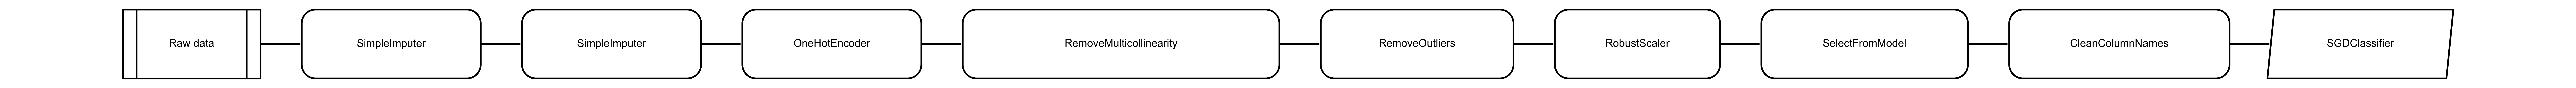

In [203]:
plot_model(top3[4], 'pipeline', scale=2)

In [192]:
predict_model(top3[4])

,Model,Accuracy,AUC,Prec.,F1,Kappa,MCC,Specificity,Sensitivity
0,SVM - Linear Kernel,0.6000,0.5981,0.4643,0.5200,0.1855,0.1895,0.6053,0.5909


,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,ET_num,Nec_num,Edema_num,ET_vol,Nec_vol,Edema_vol,Nec_ET_ratio,Edema_ET_ratio,Death,prediction_label
12,0.507087,0.186986,30.402191,162.590622,73.539108,112.587746,122.196564,153.153519,16393.333984,82.447617,...,6.0,0.0,5.0,2.144000,0.000000,14.738000,0.000000,6.874067,1,1
168,0.759475,0.208686,28.992142,138.926880,26.305893,64.899925,26.683329,128.825470,449.333344,105.511429,...,8.0,0.0,0.0,0.542000,0.000000,0.000000,0.000000,0.000000,1,0
44,0.457880,0.336053,9.883862,29.411646,15.231546,15.231546,13.416408,44.090816,1134.666626,13.467004,...,2.0,0.0,1.0,0.770000,0.000000,0.371000,0.000000,0.481818,0,0
58,0.606277,0.439946,48.745487,110.798744,116.516090,124.851913,120.432556,148.391373,122319.335938,67.174728,...,13.0,7.0,11.0,5.525000,1.065000,116.860001,0.161609,17.732929,1,0
100,0.339178,0.262870,48.272343,183.635635,114.560028,78.816238,141.449631,144.899963,121801.335938,62.285141,...,2.0,2.0,2.0,23.761000,0.551000,98.027000,0.022664,4.032042,0,1
43,0.301310,0.207393,9.568742,46.138294,44.407207,16.492422,15.231546,47.539455,1460.666626,13.901932,...,2.0,0.0,2.0,0.970000,0.000000,0.594000,0.000000,0.612371,1,0
78,0.664416,0.499557,45.894516,91.870384,129.630249,101.212646,108.903625,131.346863,100372.000000,61.040161,...,5.0,3.0,5.0,15.171000,2.664000,83.762001,0.149369,4.696496,0,0
142,0.627185,0.509323,50.008049,98.185249,88.090858,100.657837,118.118584,127.577431,126012.664062,61.580299,...,2.0,2.0,2.0,3.104000,0.911000,122.031998,0.226899,30.394022,1,1
120,0.218177,0.128395,10.522381,81.953484,28.284271,14.560220,55.172459,62.032249,1663.000000,17.880335,...,3.0,1.0,1.0,1.585000,0.046000,0.104000,0.028204,0.063765,1,1
184,0.487714,0.201642,27.012806,133.964157,76.236473,152.800522,123.223373,156.320190,10144.000000,65.336235,...,6.0,3.0,5.0,0.891000,0.048000,9.601000,0.051118,10.224708,0,0


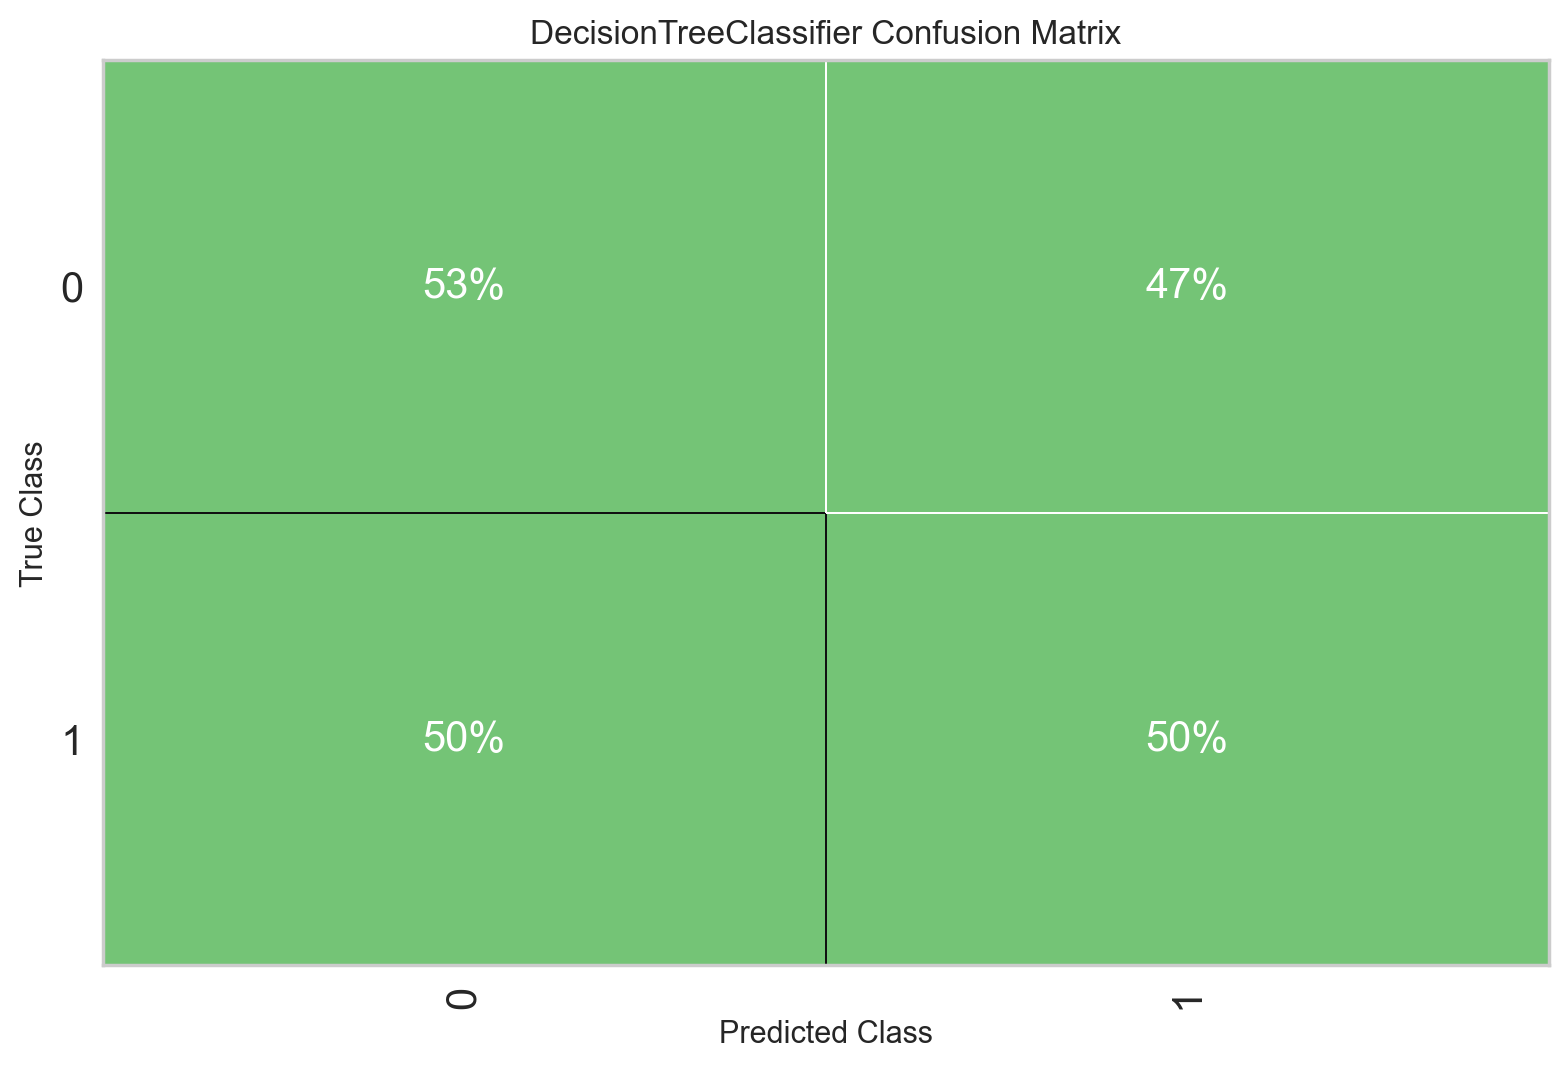

In [189]:
# evaluate_model(top3[1])

plot_model(top3[0], 'confusion_matrix', plot_kwargs = {'percent' : True})
# plot_model(top3[1], 'confusion_matrix', plot_kwargs = {'percent' : True})
# plot_model(top3[2], 'confusion_matrix', plot_kwargs = {'percent' : True})

In [193]:
result

,Model,Accuracy,AUC,Prec.,F1,Kappa,MCC,Specificity,Sensitivity
0,SVM - Linear Kernel,0.6,0.5981,0.4643,0.52,0.1855,0.1895,0.6053,0.5909


In [57]:
def tune(model):
    return tune_model(
        estimator = model,       # Model to tune
        choose_better = True,    # Return the best possible model
      #   verbose = True           # Display data
        n_iter = 20,             # Try n searches for better parameters
        optimize = 'Accuracy',      # The metric to optimize
)

In [58]:
blender = blend_models(top3, verbose=False, optimize='Sensitivity')
stacker = stack_models(top3, verbose=False, optimize='Sensitivity')
tuned_top3 = [tune_model(i, verbose=False, optimize='Sensitivity') for i in top3]
# tuned_top3 = [tune(i) for i in top3]
blender_tuned = blend_models(tuned_top3, verbose=False, optimize='Sensitivity')
stacker_tuned = stack_models(tuned_top3, verbose=False, optimize='Sensitivity')

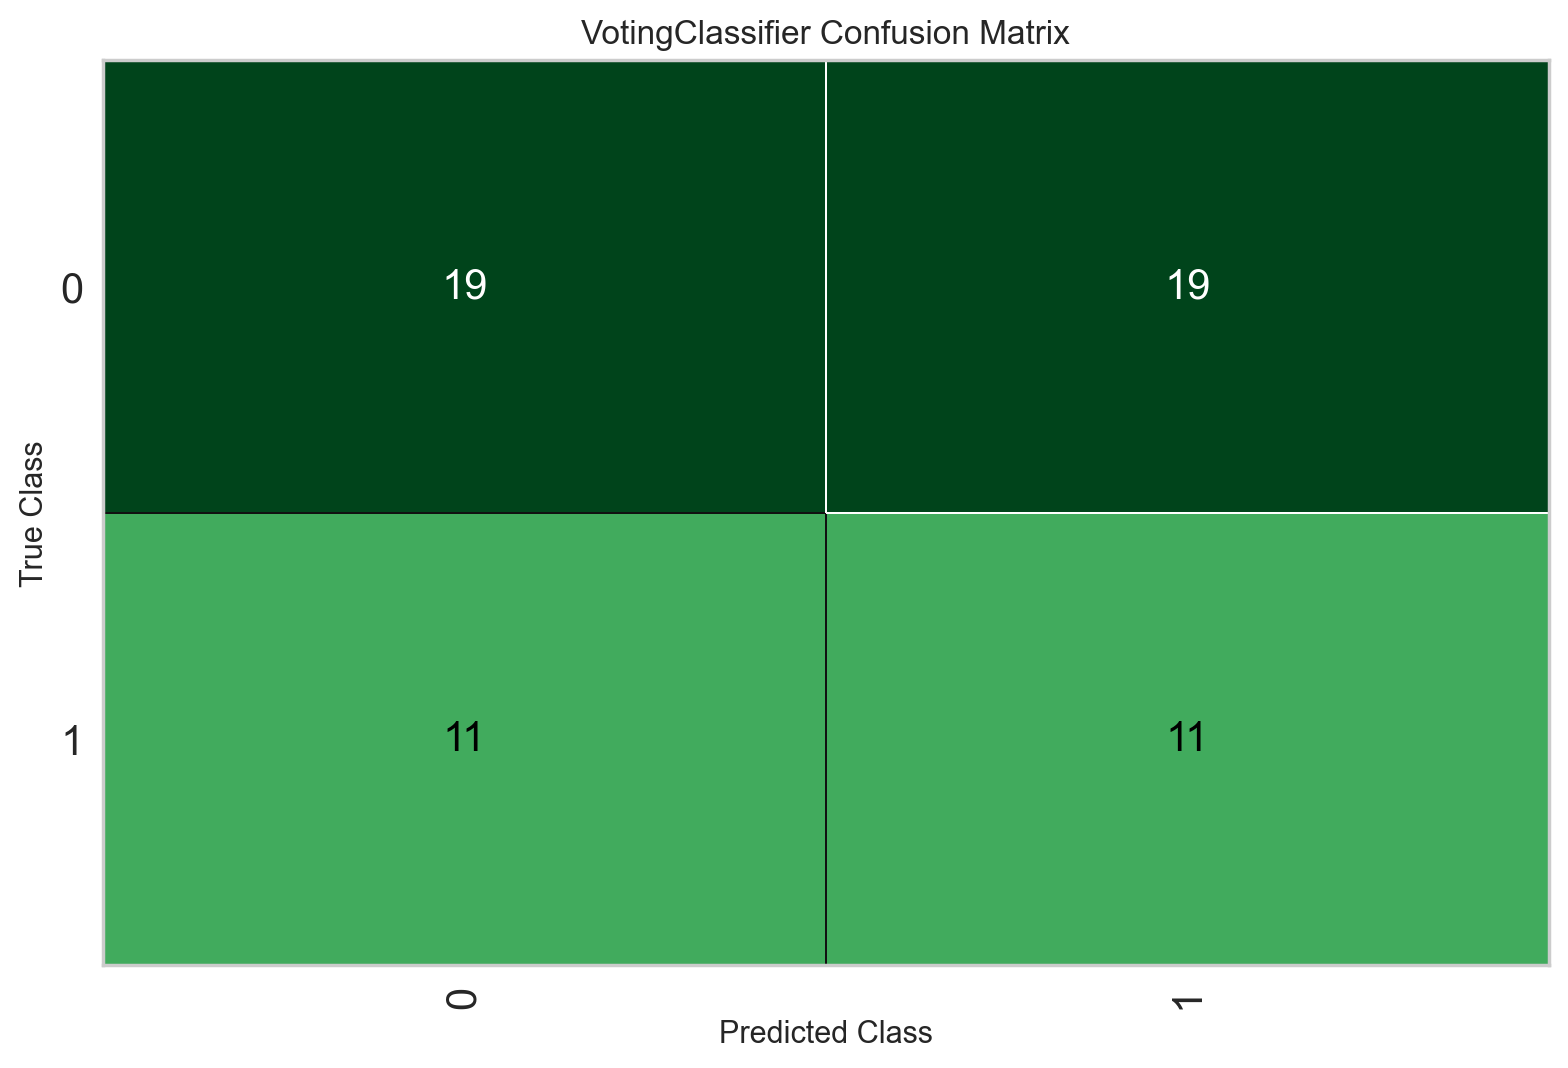

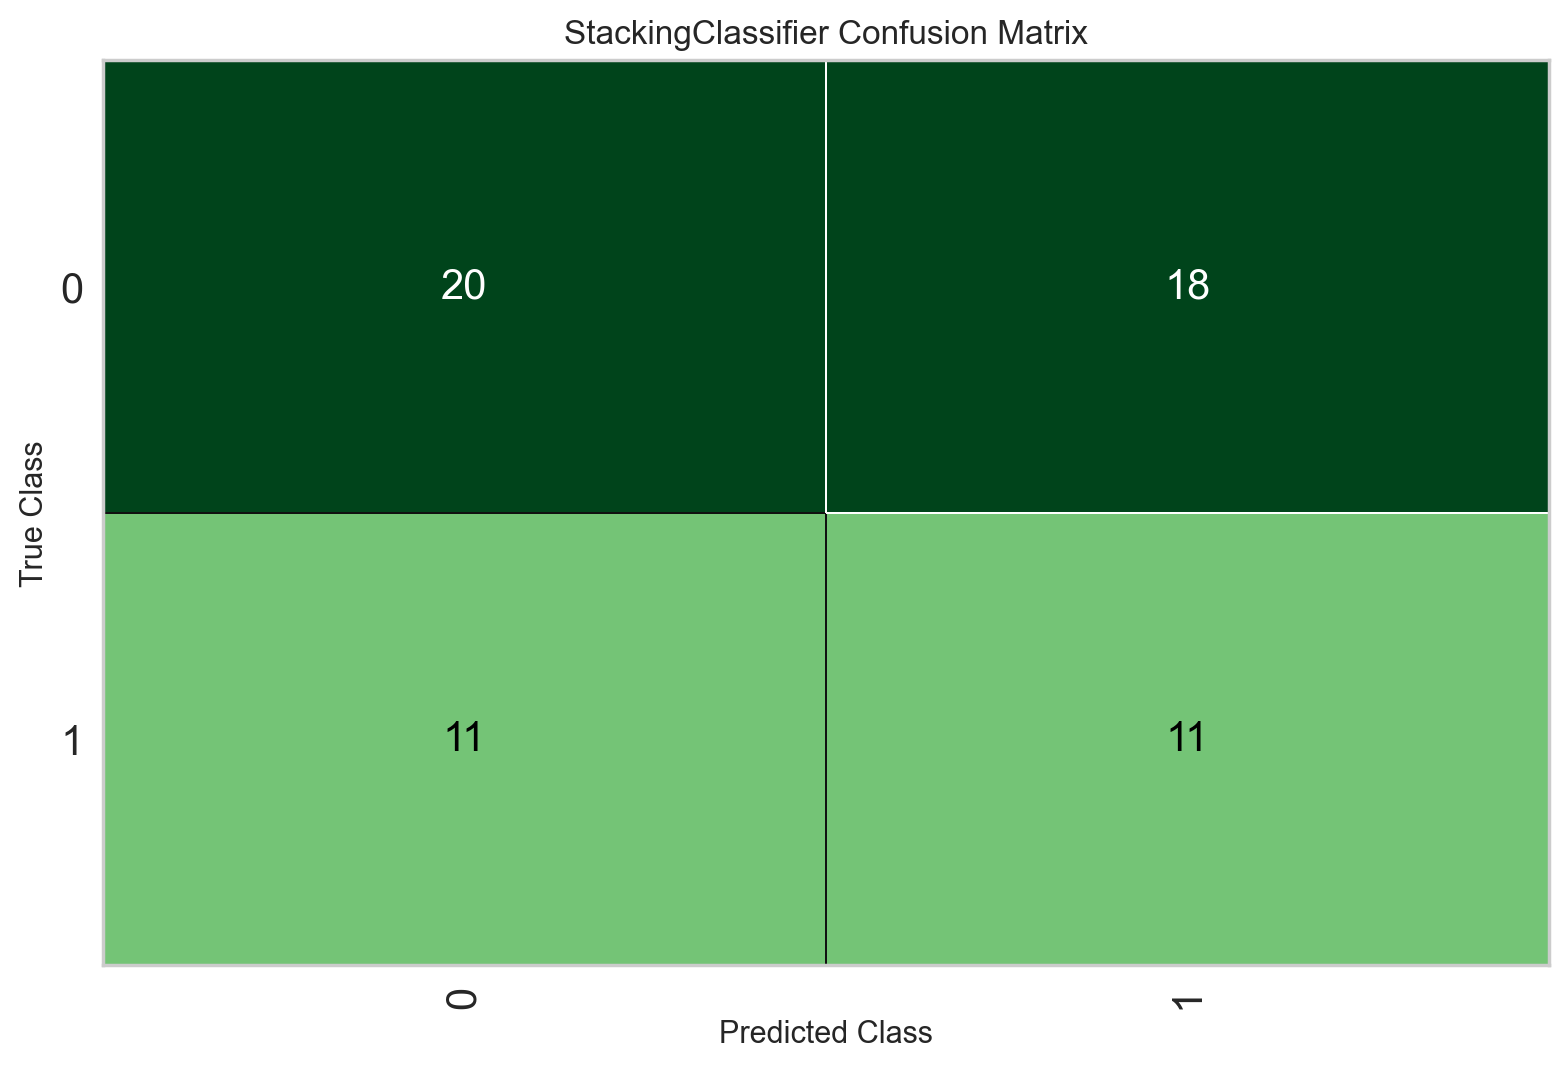

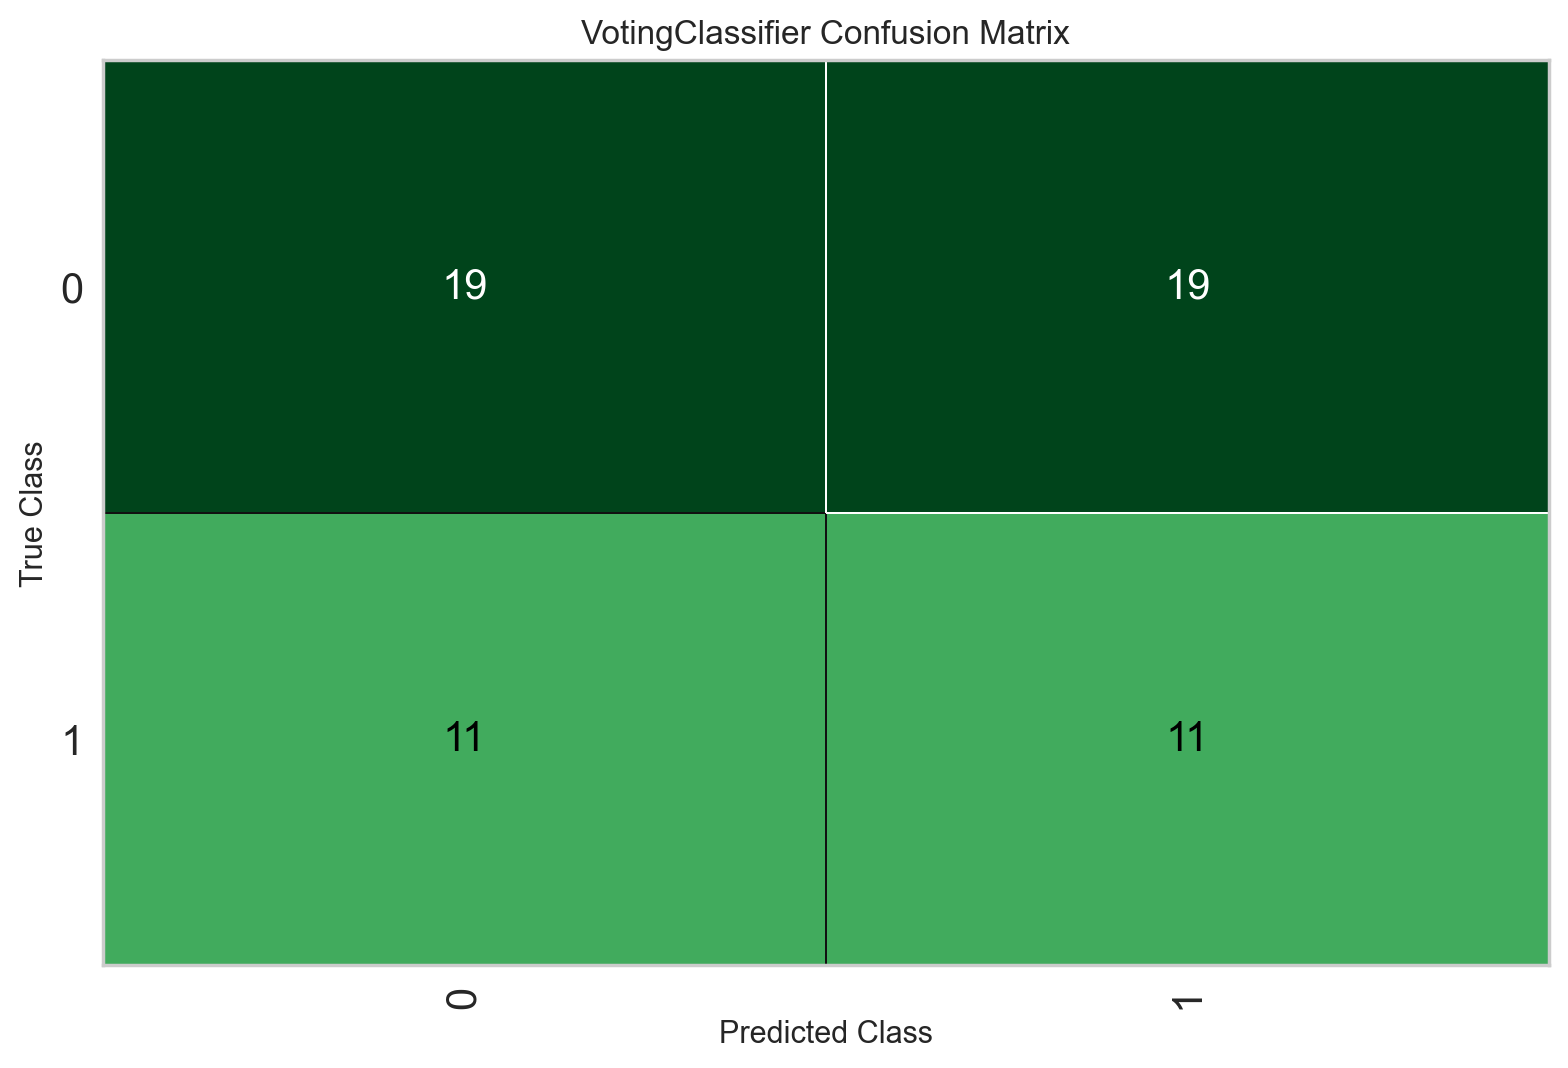

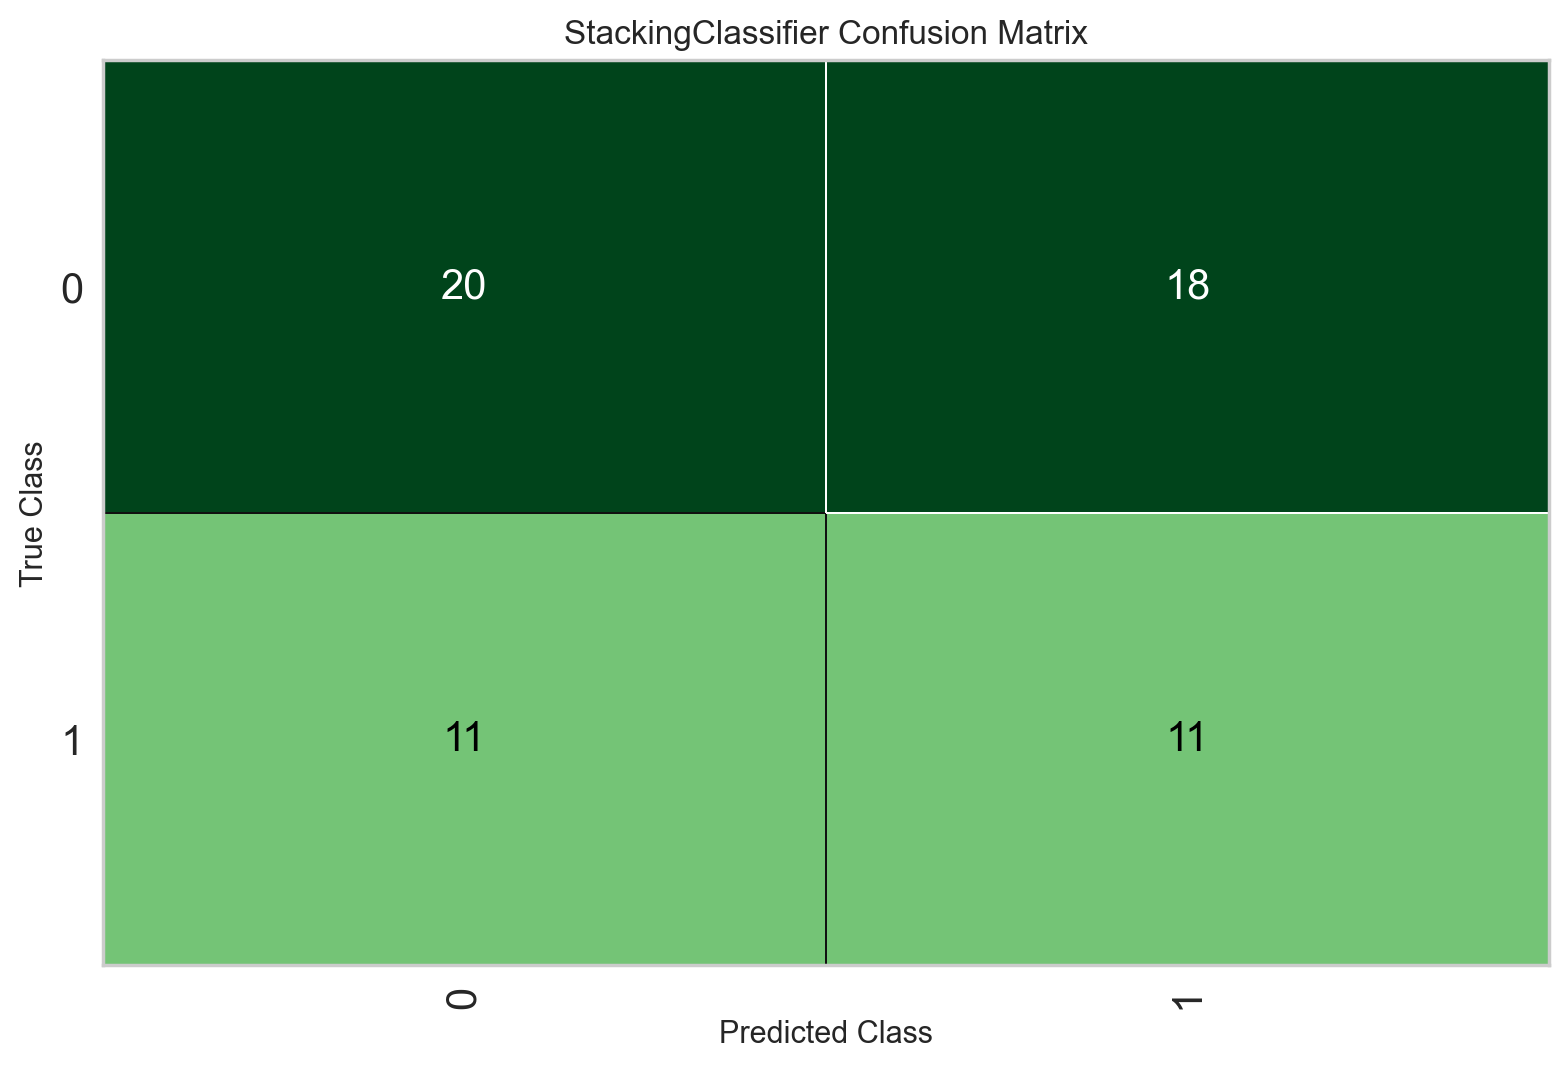

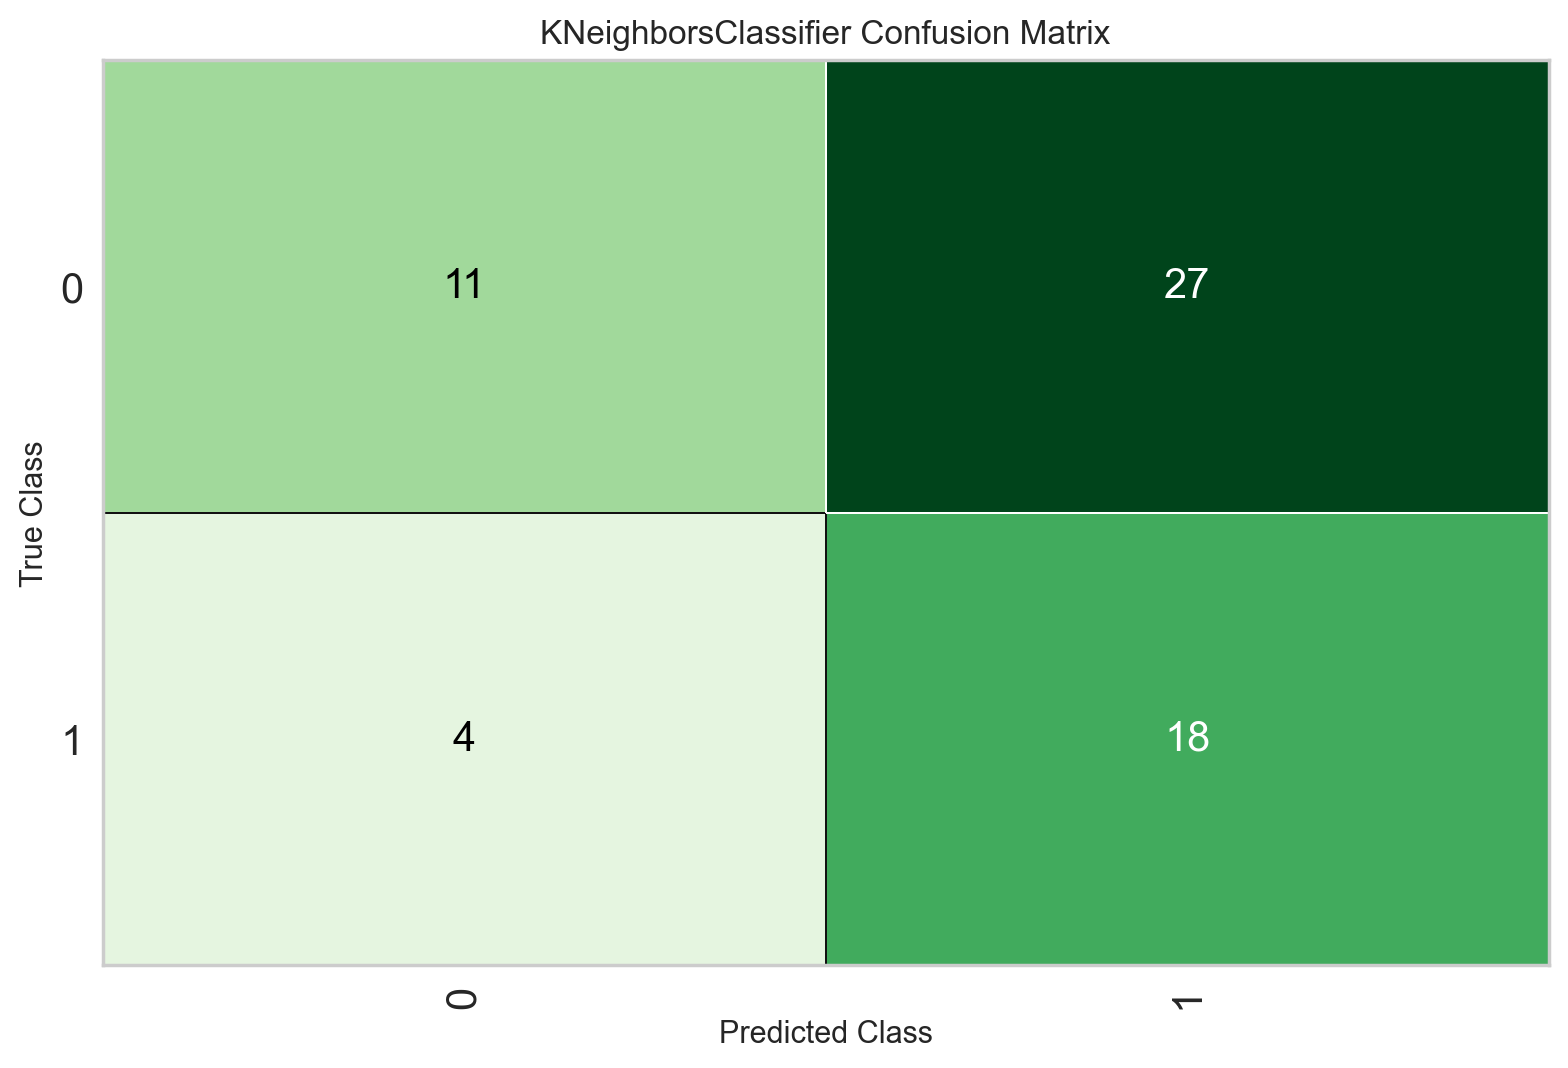

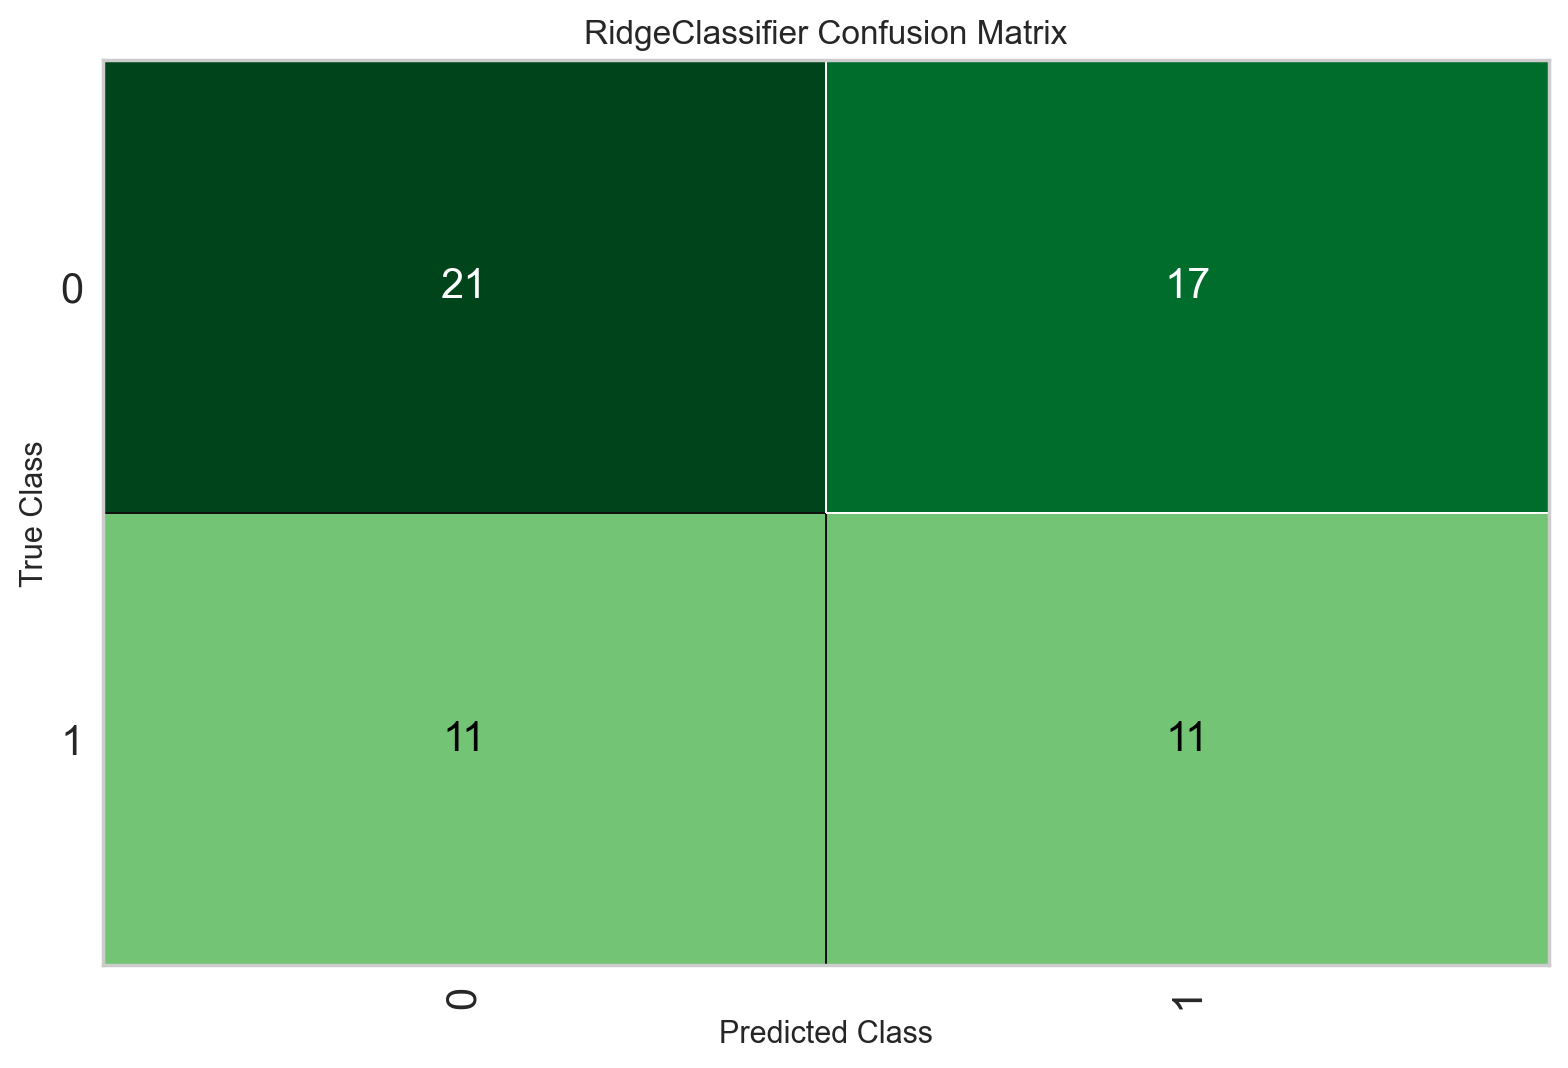

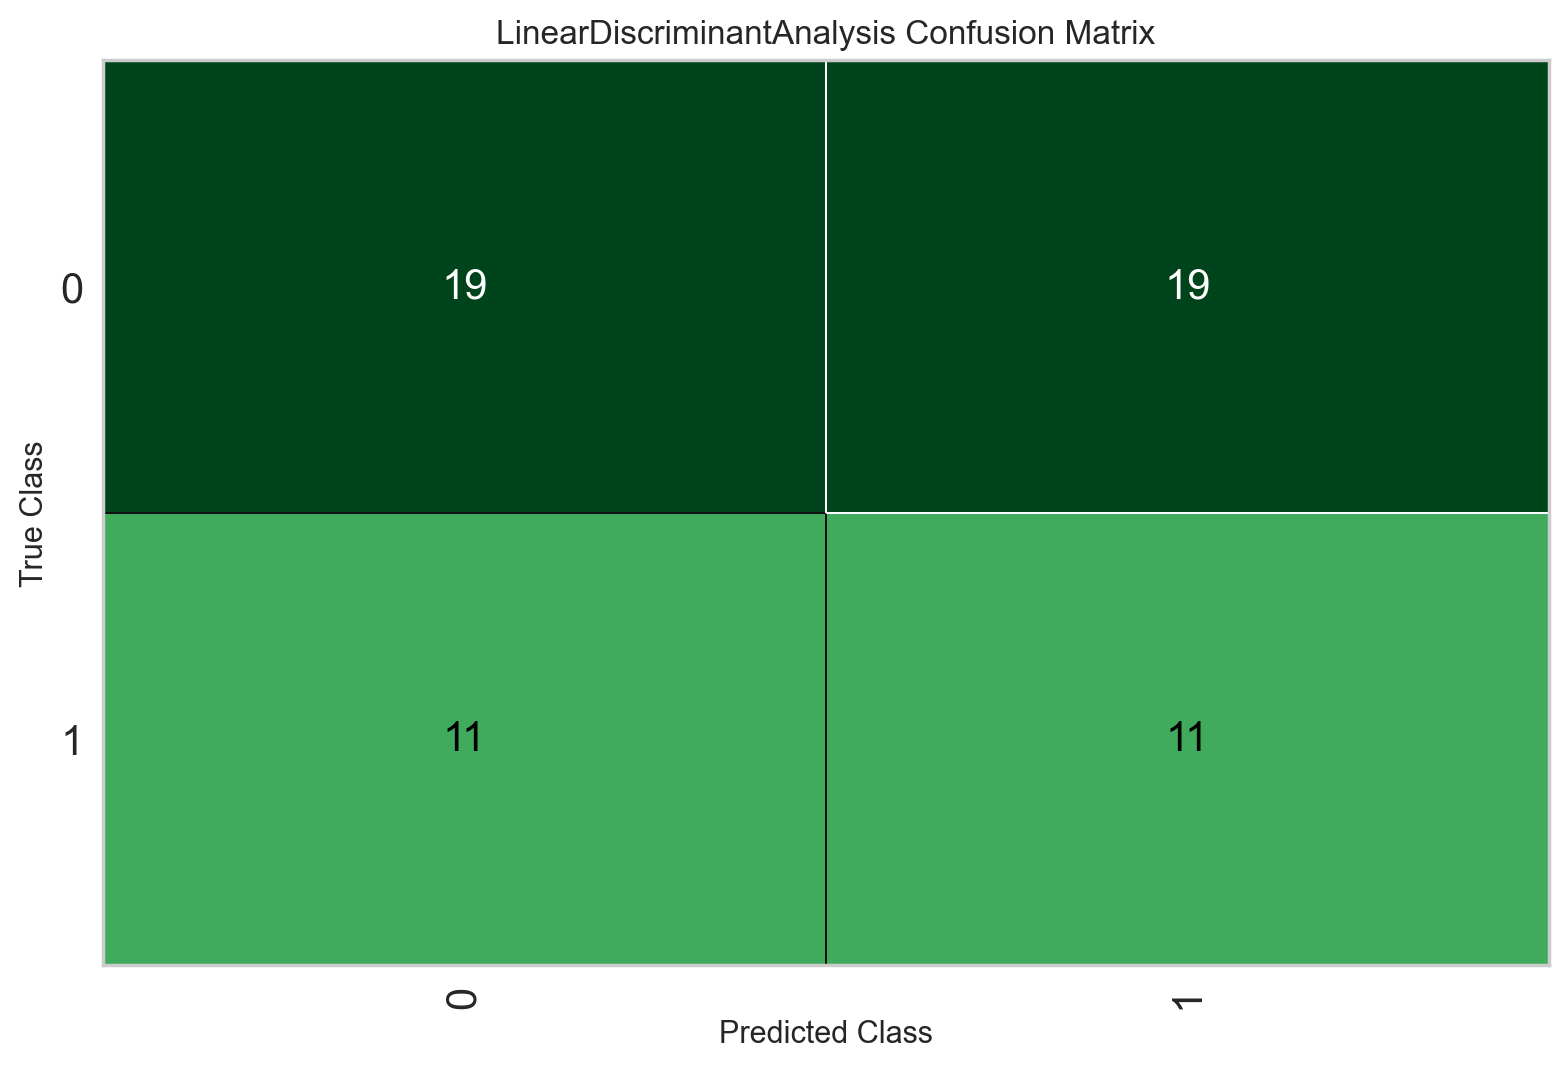

In [59]:
plot_model(blender_tuned, 'confusion_matrix')
plot_model(stacker_tuned, 'confusion_matrix')
plot_model(blender, 'confusion_matrix')
plot_model(stacker, 'confusion_matrix')
plot_model(tuned_top3[0], 'confusion_matrix')
plot_model(tuned_top3[1], 'confusion_matrix')
plot_model(tuned_top3[2], 'confusion_matrix')

In [ ]:
tuned_blender_tuned = tune(blender_tuned)
# tuned_stacker_tuned = tune(stacker_tuned)
# tuned_blender = tune(blender)
# tuned_stacker = tune(stacker)
# tuned_best = tune(best)

In [ ]:
evaluate_model(top3[1])
# evaluate_model(blender_tuned)
# evaluate_model(stacker_tuned)
# evaluate_model(blender)
# evaluate_model(stacker)
# evaluate_model(best)

In [ ]:
best = blender
evaluate_model(best)

In [ ]:
predict_model(best)

#### Retrain the model on the whole dataset

In [ ]:
finalize_model(best)

#### Save model and data

In [ ]:
session_name = 'blender-lightgbm-catboost-xgboost'

In [ ]:
models_folder = Path(os.getcwd()+'/models')

session_folder = models_folder/session_name

if not os.path.exists(session_folder): # Create directory if doesn't exist
    os.mkdir(session_folder)

# Save train datasets
get_config('X_train').to_pickle(session_folder/'X_train.pkl')
get_config('X_train_transformed').to_pickle(session_folder/'X_train_transformed.pkl')

# Save test datasets
get_config('X_test').to_pickle(session_folder/'X_test.pkl')
get_config('X_test_transformed').to_pickle(session_folder/'X_test_transformed.pkl')

# Save the model pipeline to a pickle file
save_model(best, rf'{session_folder}/model_{session_name}')

In [ ]:
dashboard(best)

In [ ]:
evaluate_model(top3[0])